# Seattle's benchmark for carbon-neutral by 2050 

## Context
 - The City of Seattle's benchmark policy is to reduce energy use and greenhouse gas emissions from existing buildings, and achieve a zero net greenhouse gas (GHG) emissions by 2050. To achieve this goal, careful surveys of the energy consumption, gas emissions, and building prpoperties (such as size, number of floors, parking etc) were conducted by city staff in 2016 and made available at https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy. However, these surveys are expensive to obtain, and from the ones already done, they want to try to predict the CO2 emissions and total energy consumption of non-housing buildings for which they have not yet been measured. 

## Task
 - To achieve this goal, I am looking closely look at the documented consumption and emissions data of non-housing buildings in the City of Seattle to predict the CO2 emissions and total energy consumption of non-residential buildings that have not yet been measured.
 - I will also evaluate and integrate the value of the "ENERGY STAR Score" for energy prediction, which is tedious to calculate with the approach currently used. 

### Part 2
 - Predict the CO2 emission
 - Evaluate influence of ENERGY STAR SCORE on gas emission 

### 1.0 Data loading
 - import the cleaned data from Part 1

In [1]:
# importation of libraries

# data loading and manipulation
import pandas as pd
import numpy as np # for array creation

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading the dataset to pandas DataFrame

Data = pd.read_csv('Data_Energy.csv', low_memory=False)
Data.head()

,BuildingType,Neighborhood,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,AreaPerBuilding,AreaPerFloor
0,NonResidential,Downtown,Hotel,Hotel,None,None,1.0,12,0,88434.0,0.0,0.0,60.0,7226362.5,249.98,89,88434.0,7370.0
1,NonResidential,Downtown,Hotel,Hotel,Parking,Restaurant,1.0,11,15064,83880.0,15064.0,4622.0,61.0,8387933.0,295.86,20,103566.0,9415.0
2,NonResidential,Downtown,Hotel,Hotel,None,None,1.0,41,196718,756493.0,0.0,0.0,43.0,72587024.0,2089.28,47,956110.0,23320.0
3,NonResidential,Downtown,Hotel,Hotel,None,None,1.0,10,0,61320.0,0.0,0.0,56.0,6794584.0,286.43,90,61320.0,6132.0
4,NonResidential,Downtown,Hotel,Hotel,Parking,Swimming Pool,1.0,18,62000,123445.0,68009.0,0.0,75.0,14172606.0,505.01,36,175580.0,9754.0


In [3]:
Data.shape

(1522, 18)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1522 non-null   object 
 1   Neighborhood                     1522 non-null   object 
 2   PrimaryPropertyType              1522 non-null   object 
 3   LargestPropertyUseType           1522 non-null   object 
 4   SecondLargestPropertyUseType     1522 non-null   object 
 5   ThirdLargestPropertyUseType      1522 non-null   object 
 6   NumberofBuildings                1522 non-null   float64
 7   NumberofFloors                   1522 non-null   int64  
 8   PropertyGFAParking               1522 non-null   int64  
 9   LargestPropertyUseTypeGFA        1522 non-null   float64
 10  SecondLargestPropertyUseTypeGFA  1522 non-null   float64
 11  ThirdLargestPropertyUseTypeGFA   1522 non-null   float64
 12  ENERGYSTARScore     

In [5]:
Data.describe()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,AreaPerBuilding,AreaPerFloor
count,1522.000000,1522.000000,1522.000000,1.522000e+03,1522.000000,1522.000000,1019.000000,1.522000e+03,1522.000000,1522.000000,1.522000e+03,1522.00
mean,1.143233,4.124836,13266.474376,9.272740e+04,18337.777462,2655.924046,65.842002,7.714137e+06,167.832799,54.363995,1.065581e+05,inf
std,1.190245,6.705816,43347.929125,1.594783e+05,48447.958911,12790.286588,28.320464,1.919568e+07,590.624890,32.589011,1.829735e+05,NaN
min,1.000000,0.000000,0.000000,5.656000e+03,0.000000,0.000000,1.000000,1.680890e+04,-0.800000,1.000000,4.300000e+03,222.00
25%,1.000000,1.000000,0.000000,2.550525e+04,0.000000,0.000000,49.000000,1.229609e+06,19.740000,27.000000,2.862400e+04,13461.25
50%,1.000000,2.000000,0.000000,4.316100e+04,0.000000,0.000000,74.000000,2.522356e+06,48.705000,51.000000,4.679850e+04,23121.50
75%,1.000000,4.000000,0.000000,8.978975e+04,12914.750000,0.000000,89.000000,6.913348e+06,134.772500,86.000000,9.935525e+04,38206.50
max,27.000000,99.000000,512608.000000,1.719643e+06,441551.000000,303910.000000,100.000000,2.930908e+08,12307.160000,116.000000,2.200000e+06,inf


check number of infinite values in FloorUnit

In [6]:
len(Data[Data.AreaPerFloor == np.inf])

10

There are 10 infinite values in FloorUnit

 - Correct infinity values in AreaPerFloor feature

In [7]:
Data[Data.AreaPerFloor == np.inf]

,BuildingType,Neighborhood,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,AreaPerBuilding,AreaPerFloor
146,NonResidential,Downtown,Hotel,Hotel,Parking,Restaurant,1.0,0,0,495536.0,438756.0,49700.0,NaN,65047284.00,1638.46,17,934292.0,inf
441,NonResidential,East,Medical Office,Medical Office,None,None,1.0,0,0,200184.0,0.0,0.0,53.0,20560622.00,692.12,12,225982.0,inf
511,NonResidential,Downtown,Other,Mall,Entertainment/Public Assembly,Restaurant,1.0,0,0,561684.0,100000.0,80000.0,NaN,46510960.00,324.25,17,947987.0,inf
996,NonResidential,East,Medical Office,Medical Office,Parking,None,1.0,0,0,228133.0,135954.0,0.0,52.0,25311526.00,1110.07,71,274568.0,inf
1079,Campus,Greater Duwamish,Other,Other,Parking,None,10.0,0,0,230970.0,0.0,0.0,NaN,21022288.00,405.05,25,23097.0,inf
1446,NonResidential,Northeast,Warehouse,Non-Refrigerated Warehouse,Office,None,1.0,0,0,349953.0,63872.0,0.0,69.0,15206762.00,391.70,76,384772.0,inf
1447,NonResidential,Northeast,Medical Office,Medical Office,None,None,1.0,0,0,28050.0,0.0,0.0,32.0,2193115.00,32.72,56,30287.0,inf
1448,NonResidential,Northeast,Small- and Mid-Sized Office,Office,Office,None,1.0,0,0,31845.0,31845.0,0.0,32.0,3947209.25,145.11,56,21931.0,inf
1461,Nonresidential COS,Northeast,Other,Recreation,None,None,8.0,0,0,564258.0,0.0,0.0,NaN,18470340.00,549.11,87,62754.0,inf
1490,NonResidential,Southeast,Other,Pre-school/Daycare,None,None,1.0,0,0,40265.0,0.0,0.0,NaN,2159170.25,51.39,7,40265.0,inf


In [8]:
inf = Data.loc[Data['AreaPerFloor'] == np.inf,'AreaPerFloor'].tolist()

Data.replace(inf, 0, inplace = True)

In [9]:
# verify the correction
Data.describe()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,AreaPerBuilding,AreaPerFloor
count,1522.000000,1522.000000,1522.000000,1.522000e+03,1522.000000,1522.000000,1019.000000,1.522000e+03,1522.000000,1522.000000,1.522000e+03,1.522000e+03
mean,1.143233,4.124836,13266.474376,9.272740e+04,18337.777462,2655.924046,65.842002,7.714137e+06,167.832799,54.363995,1.065581e+05,3.390694e+04
std,1.190245,6.705816,43347.929125,1.594783e+05,48447.958911,12790.286588,28.320464,1.919568e+07,590.624890,32.589011,1.829735e+05,4.838940e+04
min,1.000000,0.000000,0.000000,5.656000e+03,0.000000,0.000000,1.000000,1.680890e+04,-0.800000,1.000000,4.300000e+03,0.000000e+00
25%,1.000000,1.000000,0.000000,2.550525e+04,0.000000,0.000000,49.000000,1.229609e+06,19.740000,27.000000,2.862400e+04,1.331100e+04
50%,1.000000,2.000000,0.000000,4.316100e+04,0.000000,0.000000,74.000000,2.522356e+06,48.705000,51.000000,4.679850e+04,2.295600e+04
75%,1.000000,4.000000,0.000000,8.978975e+04,12914.750000,0.000000,89.000000,6.913348e+06,134.772500,86.000000,9.935525e+04,3.784850e+04
max,27.000000,99.000000,512608.000000,1.719643e+06,441551.000000,303910.000000,100.000000,2.930908e+08,12307.160000,116.000000,2.200000e+06,1.100000e+06


### 2.0 Feature selection

In [10]:
categorical_features = Data.select_dtypes(include = 'object')
numerical_features = Data.select_dtypes(include = ['float', 'int']) #Data.select_dtypes(exclude = 'object')

In [11]:
categorical_features.nunique()

BuildingType                     5
Neighborhood                    14
PrimaryPropertyType             19
LargestPropertyUseType          47
SecondLargestPropertyUseType    48
ThirdLargestPropertyUseType     37
dtype: int64

In [12]:
list(numerical_features.columns)

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge',
 'AreaPerBuilding',
 'AreaPerFloor']

 - selected features

In [13]:
# Categorical features
Cat_Feat = categorical_features.drop('ThirdLargestPropertyUseType', axis = 1)

# Numerical features
Num_Feat= numerical_features.drop(['ENERGYSTARScore', 'SiteEnergyUse(kBtu)'], axis = 1)

# create new data frame of the selected features for energy prediction
Data_Emission = pd.concat([Cat_Feat, Num_Feat], axis = 1)

- Evaluate correlation coefficient amongst numerical variables

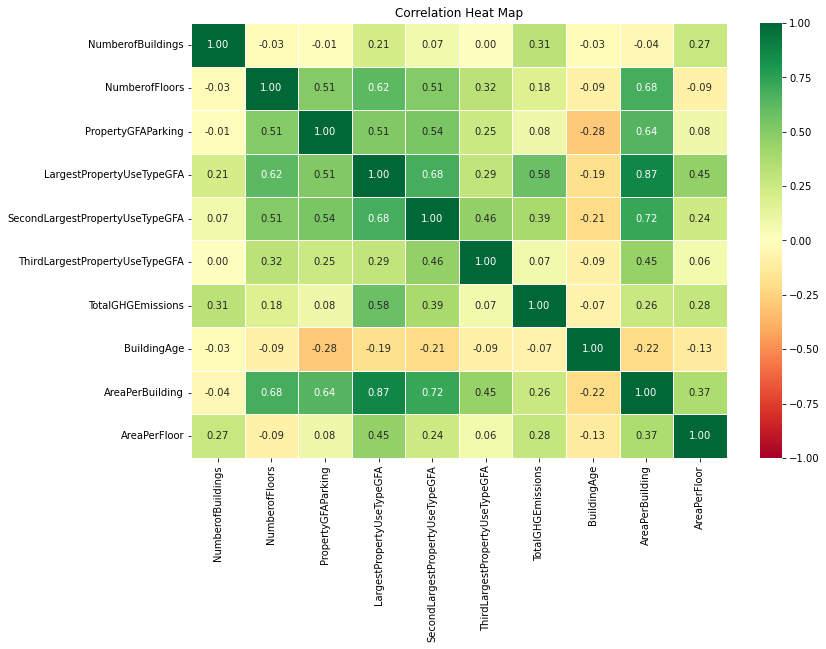

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(Num_Feat.corr(), fmt='.2f', center=0, cmap='RdYlGn', vmin=-1, vmax=1, annot=True, linewidths=.5)
plt.title('Correlation Heat Map')
plt.show()

 - Using a threshold of 0.7, there is no strong correlation amongst most of the numerical input features except between AreaPerBuilding and Largest and SecondLargestproperties. Therefore, AreaPerBuilding is dropped to avoid multicollinearity.

In [15]:
Data_Emission.drop('AreaPerBuilding', axis = 1, inplace = True)

### 3.0 Modelings

### 3.1 Baseline models
   - Dummy regressor
   - Linear regression

##### 3.1.1 Pre-processing

- Set up train-test split

In [16]:
# Define the input (X) and target (y) features
X = Data_Emission.drop('TotalGHGEmissions', axis = 1)
y = Data_Emission['TotalGHGEmissions']

In [17]:
# Split data to 70% training and 30% test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
#Check shape of splitted data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1065, 13) (457, 13) (1065,) (457,)


In [19]:
Num_feat = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking','LargestPropertyUseTypeGFA', 
            'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge','AreaPerFloor']
Cat_feat = Cat_Feat.columns.tolist()

In [20]:
# Standardize/scale the features and define the pipeline pre-preprocessor

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error
from math import sqrt
import time
import warnings
warnings.filterwarnings('ignore')

def pipeline_Base(Base):
    #Preprocessing for numerical data
    numeric_transformer = Pipeline([('scaler', RobustScaler())])

    # Encode categorical data with OneHotEncoder
    categorical_transformer = Pipeline([('scaler', OneHotEncoder(handle_unknown="ignore"))])

    # Combine preprocessing for numerical and categorical data - transformation
    preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, Num_feat),
    ("cat", categorical_transformer, Cat_feat)])
    
    # Bundle preprocessing and modeling code in a pipeline
    Base_pipe = Pipeline([("preprocessor", preprocessor), ("regressor", Base)])
    return Base_pipe

##### 3.1.2 Create the baseline models and evaluate their perfomance metrics

In [21]:
i=0

# create dictionary of the baseline models
Baseline = {"Dummy" : pipeline_Base(DummyRegressor(strategy = "mean")),
           "LinearRegression" : pipeline_Base(LinearRegression())}

# Create DataFrame for metric results
Base_Test_M = pd.DataFrame({
                    'Model_Test':Baseline.keys(),
                    'MSE' : np.zeros(len(Baseline)),
                    'MAE': np.zeros(len(Baseline)),
                    'RMSE': np.zeros(len(Baseline)),
                    'R2_Test': np.zeros(len(Baseline)),
                    'R2_Train': np.zeros(len(Baseline)),
                    #'R2_Test': np.zeros(len(Baseline)),
                    'Training time (mins)': np.zeros(len(Baseline))
                    })

# Create the baseline models

for key, base in Baseline.items():
    start = time.time()
    reg_base = base.fit(X_train, y_train)
        
    # evaluation metrics on test sets
    
    y_test_pred = base.predict(X_test)
    y_train_pred = base.predict(X_train)
    
    # results
    Base_Test_M.iloc[i,1] = mean_squared_error(y_test, y_test_pred)
    Base_Test_M.iloc[i,2] = median_absolute_error(y_test, y_test_pred)
    Base_Test_M.iloc[i,3] = np.sqrt(mean_squared_error(y_test, y_test_pred))
    Base_Test_M.iloc[i,4] = r2_score(y_test, y_test_pred)#base.score(X_test, y_test) #r2_score(y_test, y_pred)
    Base_Test_M.iloc[i,5] = r2_score(y_train, y_train_pred)
    #Base_Test_M.iloc[i,5] = reg_base.score(X_train, y_train)
    #Base_Test_M.iloc[i,6] = reg_base.score(X_test, y_test)
          
    stop = time.time()
    Base_Test_M.iloc[i,6]=np.round((stop - start)/60, 2)
   
    i+=1
    
Base_Test_M

,Model_Test,MSE,MAE,RMSE,R2_Test,R2_Train,Training time (mins)
0,Dummy,200729.248785,131.922977,448.028179,-1.391252e-07,0.00000,0.0
1,LinearRegression,133737.438172,78.248032,365.701296,3.337421e-01,0.79084,0.0


##### 3.1.3 Cross validation of the baseline models 

In [22]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_validate

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

i=0

#Create result dictionary and dataframe

cv_scores = pd.DataFrame({'Model':Baseline.keys(),
                          'Mean' : np.zeros(len(Baseline)),
                          'Std': np.zeros(len(Baseline)),
                         'Training time (mins)': np.zeros(len(Baseline))})

#Create the regression models
for key, base in Baseline.items():
    start = time.time()
    #scores = cross_validate(model, X, y, cv=kfold, scoring='r2')
    scores = cross_val_score(base, X, y, cv=kfold)
        
    cv_scores.iloc[i,1] = scores.mean()
    cv_scores.iloc[i,2] = scores.std()
        
    stop = time.time()
    cv_scores.iloc[i,3]=np.round((stop - start)/60, 2)
   
    i+=1
    
cv_scores

,Model,Mean,Std,Training time (mins)
0,Dummy,-0.041578,0.077173,0.00
1,LinearRegression,-0.065628,0.993061,0.02


Narration: 
- The evaluation metrics (MAE, MSE, RMSE, and R2 scores) of bot dummy regressor and linear regression model are poor.

Seven linear (Linear, Ridge, Lasso, and ElasticNet) and non-linear (Random Forest Regression, XGBoost, and KNN) supervised learning regression models are assessed to understand how well they could predict gas emission. Linear regression is used as the baseline and the R2, MSE, MAE, and RMSE metric to evaluate the perfomance of the models. 

The datasets are iterated and cross validated three times in different forms, feature engineering (transformations), initial parameters. The iteration and algorithm with best perfomance metrics is chosen for predictions.
 - Iteration 1 - used the numerical features in their raw forms without any transformation
 - Iteration 2 - log transformation of the target feature
 - Iteration 3 - log transformation of all numeric input and target features

### 3.2 Modeling 1

 - Untransformed input and target features, random state of 0, and K-fold cross validation 
 - Use RobustScaler and OneHotEncoder to scale the numerical and categorical data, respectively. RobustScaler is used to handle the skewness of the numerical features and likely outliers

In [23]:
# import the models/algorithms

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import time
import warnings
warnings.filterwarnings('ignore')

# Design preprocessing pipelines for the algorthims
def pipeline(Model):
   
    # Standardize data and instantiate pipeline
    numeric_transformer = Pipeline([('scaler', RobustScaler())]) 
    categorical_transformer = Pipeline([('scaler', OneHotEncoder(handle_unknown="ignore"))])

    model_preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, Num_feat),
        ("cat", categorical_transformer, Cat_feat),])
    
    model_pipe = Pipeline(steps=[("preprocessor", model_preprocessor), ("regressor", Model)])
    return model_pipe

- Creat dictionaries of the algorithm objects 

In [24]:
# make a dictionary and instantiate the models via pipeline

Models = {"KNN" : pipeline(KNeighborsRegressor()), 
        "LinearRegression" : pipeline(LinearRegression()),
         "Ridge" : pipeline(Ridge(alpha = 0.1)),
         "Lasso" : pipeline(Lasso(alpha = 0.1)),
         "Elastic" : pipeline(ElasticNet(alpha = 0.1)),
         "RandomForest" : pipeline(RandomForestRegressor()), 
         "XGB": pipeline(XGBRegressor())}

#### 3.2.1 Hyperparameter optimization and Performance metrics
- RandomizedSearchCV is used because of its fast training time over GridSearchCV

In [25]:
# create dictionary of selected models
Models_1 = {"KNN" : pipeline(KNeighborsRegressor()), 
        "LinearRegression" : pipeline(LinearRegression()),
         "Ridge" : pipeline(Ridge(alpha = 0.1)),
         "Lasso" : pipeline(Lasso(alpha = 0.1)),
         "Elastic" : pipeline(ElasticNet(alpha = 0.1)),
         "RandomForest" : pipeline(RandomForestRegressor()), 
         "XGB": pipeline(XGBRegressor())
           }

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define grid parameters
Lasso_grid = {'regressor__alpha': [0.1,1,5,10,50,100], 'regressor__fit_intercept': [True]}

RF_grid = {'regressor__max_features' : ['auto', 'sqrt', 'log2'],
           'regressor__n_estimators': [10, 50, 100, 200], 
           'regressor__max_depth': [5, 15, 25, 50], 
           'regressor__min_samples_split': [2, 5, 10],
           'regressor__min_samples_leaf': [1,2,5,10],
           'regressor__bootstrap': [True, False],
           'regressor__random_state': [0,50]}

Ridge_grid = {'regressor__alpha': [0.1,1,5,10,50,100], 'regressor__normalize': [True],
              "regressor__solver": ['auto']}
LR_grid = {'regressor__fit_intercept': [False]}

XGB_grid = {'regressor__max_depth': [3,6,9,12,15], 
            'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
           'regressor__n_estimators': [50,100,125, 150],
            'regressor__gamma': [0, 0.25, 0.5, 1.0],
           'regressor__min_child_weight': [1,2,3,5,7,9]}

KNN_grid = {'regressor__n_neighbors': [2,3,4,5,6,7,8,9,10], 
             'regressor__p': [1, 2, 5]}

#SVR_grid = {'regressor__C': [0.01, 0.1, 1.0, 10.0], 'regressor__gamma': np.logspace(2, 5),'regressor__kernel': ['linear']}

Elastic_grid = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}
            
parameters = {"KNN": KNN_grid, "Lasso" : Lasso_grid, "RandomForest": RF_grid, "Ridge": Ridge_grid, 
              "LinearRegression" : LR_grid, "Elastic" : Elastic_grid, 
              "XGB": XGB_grid,# "SVR" : SVR_grid, 
             }

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

i=0
GS_model_best_params = Models_1.copy()
# create DataFrame for metric results
scores_GS_1 = pd.DataFrame({
                    'Model_GS':Models_1.keys(),
                    'MSE' : np.zeros(len(Models_1)),
                    'MAE': np.zeros(len(Models_1)),
                    'RMSE': np.zeros(len(Models_1)),
                    'R2_Train' : np.zeros(len(Models_1)),
                    'R2_Test': np.zeros(len(Models_1)),
                    'Training time (mins)': np.zeros(len(Models_1))
                    })

# Make the GridSearchCV model 

for key, model in Models_1.items():
    start = time.time()
    GS_model = RandomizedSearchCV(estimator=model, param_distributions=parameters[key], n_jobs=-1, 
                                  n_iter = 20, cv=kf, verbose=0)

    # fitting the dataset i.e X and y
    GS_model.fit(X_train, y_train)
    y_pred = GS_model.predict(X_test)
    
    #get the results
    scores_GS_1.iloc[0,1] = round(mean_squared_error(y_test, y_pred), 3)
    scores_GS_1.iloc[0,2] = round(median_absolute_error(y_test, y_pred), 3)
    scores_GS_1.iloc[0,3] = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
    scores_GS_1.iloc[i,4] = round(GS_model.score(X_train, y_train), 2)
    scores_GS_1.iloc[i,5] = round(GS_model.score(X_test, y_test), 2)
    GS_model_best_params[key]=GS_model.best_params_
    
    #scores_GS_1.iloc[i,1] = r2_score(y_test, y_pred)
            
    stop = time.time()
    scores_GS_1.iloc[i,6]=np.round((stop - start)/60, 2)
          
    i += 1 

scores_GS_1.sort_values('R2_Test', ascending = False)

,Model_GS,MSE,MAE,RMSE,R2_Train,R2_Test,Training time (mins)
6,XGB,0.000,0.000,0.000,0.99,0.70,0.62
5,RandomForest,0.000,0.000,0.000,1.00,0.63,0.36
2,Ridge,0.000,0.000,0.000,0.68,0.55,0.01
0,KNN,59665.708,39.412,244.266,0.91,0.48,0.09
3,Lasso,0.000,0.000,0.000,0.75,0.37,0.01
4,Elastic,0.000,0.000,0.000,0.76,0.37,0.54
1,LinearRegression,0.000,0.000,0.000,0.79,0.33,0.01


Get best hyperparameters

In [28]:
GS_model_best_params

{'KNN': {'regressor__p': 1, 'regressor__n_neighbors': 2},
 'LinearRegression': {'regressor__fit_intercept': False},
 'Ridge': {'regressor__solver': 'auto',
  'regressor__normalize': True,
  'regressor__alpha': 1},
 'Lasso': {'regressor__fit_intercept': True, 'regressor__alpha': 5},
 'Elastic': {'regressor__max_iter': 10,
  'regressor__l1_ratio': 0.5,
  'regressor__alpha': 0.01},
 'RandomForest': {'regressor__random_state': 0,
  'regressor__n_estimators': 200,
  'regressor__min_samples_split': 2,
  'regressor__min_samples_leaf': 1,
  'regressor__max_features': 'log2',
  'regressor__max_depth': 25,
  'regressor__bootstrap': False},
 'XGB': {'regressor__n_estimators': 125,
  'regressor__min_child_weight': 2,
  'regressor__max_depth': 3,
  'regressor__learning_rate': 0.3,
  'regressor__gamma': 0}}

##### 3.2.2 K-fold cross validation
- Crosscheck accuracy of model perfomances on test dataset

In [29]:
# create 10 folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

i=0

#Create result dictionary and dataframe

cv_scores = pd.DataFrame({'Model':Models.keys(),
                          'R2 Mean' : np.zeros(len(Models)),
                          'R2 Std': np.zeros(len(Models)),
                         'Training time (mins)': np.zeros(len(Models))})

#Create the regression models
for key, model in Models.items():
    #scores = cross_validate(model, X, y, cv=kfold, scoring='r2')
    scores = cross_val_score(model, X, y, cv=kfold)
        
    cv_scores.iloc[i,1] = round(scores.mean(), 2)
    cv_scores.iloc[i,2] = round(scores.std(), 2)
    
    stop = time.time()
    cv_scores.iloc[i,3]=np.round((stop - start)/60, 2)  
    
    i+=1
    
cv_scores.sort_values('R2 Mean', ascending = False)

,Model,R2 Mean,R2 Std,Training time (mins)
6,XGB,0.56,0.23,1.14
0,KNN,0.40,0.14,0.63
5,RandomForest,0.14,0.99,1.10
3,Lasso,0.06,0.93,0.68
1,LinearRegression,0.04,0.96,0.64
2,Ridge,-0.01,0.04,0.64
4,Elastic,-0.25,1.37,0.68


###### Narration - 
RandomForest and XGBoost have the best metrics in hyperparameter tuning and k-fold cross validation, respectively.  However, except for Ridge, the algorithms shows considerable overffiting (high bias and low variance) as observed by the high difference between the train and test R2 data, suggesting good performance on the training data and weak performance on the test data.

### 3.3 Modeling 2
 - Log tranformation of the target feature to stabilize variance and adhere closely to the normal distribution
 - K-fold of 10 and random state = 50

#### 3.3.1 Skewness

In [30]:
# calculate the skewness
from scipy.stats import skew

skew_ness = Data_Emission[Num_feat + ['TotalGHGEmissions']].skew().sort_values(ascending = False)
skewness = pd.DataFrame({"Skew" : skew_ness})
skew_ness

NumberofBuildings                  14.053433
TotalGHGEmissions                  13.124832
ThirdLargestPropertyUseTypeGFA     12.969222
AreaPerFloor                       10.060170
NumberofFloors                      6.070012
LargestPropertyUseTypeGFA           5.295093
PropertyGFAParking                  5.192259
SecondLargestPropertyUseTypeGFA     4.736858
BuildingAge                         0.283989
dtype: float64

 - The distribution plots (see the cleaning and exploratory data notebook) and calculated skew values show that the numeric variables, except the building age, are slightly skewed to the right, and mostly follow power distributions rather than normal distributions, making the algorithm more likely to be biased. 
 - Transforming data into a relatively normal distributions allows the algorithm to compare the relative relationship between data points better. 
 - Therefore, the target variable is tranformed to log to reduce skewness. 

###### 3.3.2 Log transformation of the target variable

In [31]:
from sklearn.preprocessing import FunctionTransformer
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
y_log = logtransformer.transform(y+1)

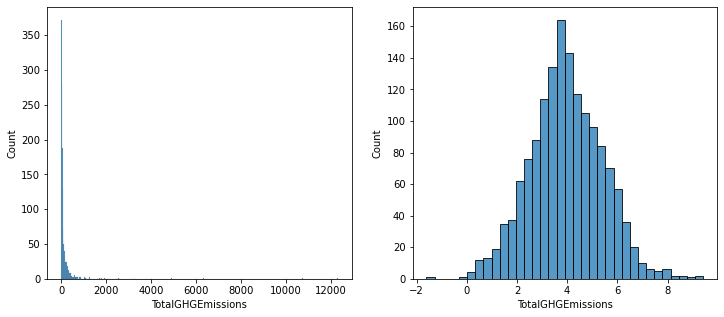

In [32]:
# visualize untranformed and log_transformed target feature

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.histplot(y, ax=ax1)
sns.histplot(y_log, ax=ax2)    
plt.show()

- log transformation of of the target feature changed the distribution to a near-normal distribution curve with zero skew 

In [33]:
# Split data to 70% training and 30% test sets
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.30, random_state=50)

Design preprocessing pipelines for the algorthims
 - use RobustScaler() to scale numeric features 
 - TargetEncoder for categorical features because unlike OnehotEncoder; TargetEncoder:
  - group the data by each category and count the number of occurrences of each target.
  - calculates the probability of each target occurring for each specific group.

In [34]:
from category_encoders import TargetEncoder

def pipeline_1(Model_log):
    
    # standadize and instantiate the pipeline
    numeric_transformer = Pipeline([('scaler', RobustScaler())]) 
    categorical_transformer = Pipeline([('scaler', TargetEncoder())])

    preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, Num_feat),
        ("cat", categorical_transformer, Cat_feat),])
    
    pipe_log = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", Model_log)])
    
    return  pipe_log

Create dictionary and instantiate models

###### 3.3.3 Hyperparameter tuning and model performance evaluations

In [35]:
# Create dictionary and instantiate models

Models_log_GS = {"KNN" : pipeline_1(KNeighborsRegressor()), 
              #"LinearRegression" : pipeline_1(LinearRegression()),
              "Ridge" : pipeline_1(Ridge(alpha = 0.1)),
              "Lasso" : pipeline_1(Lasso(alpha = 0.1)),
              "Elastic" : pipeline_1(ElasticNet (alpha = 0.1)),
              #"SVR" : pipeline_1(SVR(kernel="linear")), 
              "RandomForest" : pipeline_1(RandomForestRegressor()), 
              #"DecisionTree": pipeline_1(DecisionTreeRegressor()), 
              "XGB": pipeline_1(XGBRegressor())
             }   

parameters = {"KNN": KNN_grid, "Lasso" : Lasso_grid, "RandomForest": RF_grid, "Ridge": Ridge_grid, 
              "Elastic" : Elastic_grid,  "XGB": XGB_grid,
              #"DecisionTree": DT_grid, "SVR" : SVR_grid, "LinearRegression" : LR_grid,              
             }

metric_log_GS = pd.DataFrame({
                    'Model':Models_log_GS.keys(),
                    'MSE' : np.zeros(len(Models_log_GS)),
                    'MAE': np.zeros(len(Models_log_GS)),
                    'RMSE': np.zeros(len(Models_log_GS)),
                    'R2_Train': np.zeros(len(Models_log_GS)),
                    'R2_Test': np.zeros(len(Models_log_GS)),
                    'Training time (mins)': np.zeros(len(Models_log_GS))})


kf = KFold(n_splits=10, shuffle=True, random_state=50)

i=0
GS_model_best_params = Models_log_GS.copy()

# Make the RandomizedSearchCV model 

for key, model in Models_log_GS.items():
    start = time.time()
    GS_model = RandomizedSearchCV(estimator=model, param_distributions=parameters[key], n_jobs=-1, 
                                  n_iter = 20, cv=kf, verbose=0) 
    #GridSearchCV(estimator=model, param_grid=parameters[key], n_jobs=-1, cv=kf, verbose=0)

    # fitting the dataset i.e X and y
    reg_log_2 = GS_model.fit(X_train, y_log_train)
    y_log_pred = GS_model.predict(X_test)
    
    #get the results
    
    metric_log_GS.iloc[i,1] = round(mean_squared_error(y_log_test, y_log_pred), 3)
    metric_log_GS.iloc[i,2] = round(median_absolute_error(y_log_test, y_log_pred), 3)
    metric_log_GS.iloc[i,3] = round(np.sqrt(mean_squared_error(y_log_test, y_log_pred)), 3)
    metric_log_GS.iloc[i,4] = round(reg_log_2.score(X_train, y_log_train), 3)
    metric_log_GS.iloc[i,5] = round(reg_log_2.score(X_test, y_log_test), 3)
    GS_model_best_params[key]=GS_model.best_params_
    
    #scores_GS_2.iloc[i,1] = r2_score(y_log_test, y_log_pred)
            
    stop = time.time()
    metric_log_GS.iloc[i,6]=np.round((stop - start)/60, 2)
          
    i += 1

In [36]:
metric_log_GS.sort_values('R2_Test', ascending = False)

,Model,MSE,MAE,RMSE,R2_Train,R2_Test,Training time (mins)
4,RandomForest,0.971,0.628,0.985,0.879,0.520,0.74
5,XGB,0.982,0.648,0.991,0.674,0.515,1.02
1,Ridge,1.233,0.723,1.111,0.470,0.390,0.08
3,Elastic,1.235,0.710,1.111,0.459,0.389,0.24
2,Lasso,1.243,0.704,1.115,0.452,0.385,0.08
0,KNN,1.272,0.730,1.128,0.511,0.371,0.27


In [37]:
# Get best model parameters of each algorithms
GS_model_best_params

{'KNN': {'regressor__p': 1, 'regressor__n_neighbors': 10},
 'Ridge': {'regressor__solver': 'auto',
  'regressor__normalize': True,
  'regressor__alpha': 0.1},
 'Lasso': {'regressor__fit_intercept': True, 'regressor__alpha': 0.1},
 'Elastic': {'regressor__max_iter': 100,
  'regressor__l1_ratio': 0.5,
  'regressor__alpha': 0.1},
 'RandomForest': {'regressor__random_state': 0,
  'regressor__n_estimators': 200,
  'regressor__min_samples_split': 5,
  'regressor__min_samples_leaf': 1,
  'regressor__max_features': 'sqrt',
  'regressor__max_depth': 25,
  'regressor__bootstrap': True},
 'XGB': {'regressor__n_estimators': 125,
  'regressor__min_child_weight': 3,
  'regressor__max_depth': 3,
  'regressor__learning_rate': 0.05,
  'regressor__gamma': 0.5}}

###### 3.3.4 Cross validation

In [38]:
# create 5 folds

kfold = KFold(n_splits=10, shuffle=True, random_state=50)

i=0

#Create result dictionary and dataframe

scores_log = pd.DataFrame({'Model':Models_log_GS.keys(),
                           'R2 Mean' : np.zeros(len(Models_log_GS)),
                          'Std': np.zeros(len(Models_log_GS)),
                           'Training time (mins)': np.zeros(len(Models_log_GS))})

#Create the regression models
for key, model in Models_log_GS.items():
    cv_score = cross_val_score(model, X, y_log, cv=kfold, scoring='r2')
        
    scores_log.iloc[i,1] = round(cv_score.mean(), 2)
    scores_log.iloc[i,2] = round(cv_score.std(), 2)
    
    stop = time.time()
    scores_log.iloc[i,3]=np.round((stop - start)/60, 2)  
    i+=1
    
scores_log.sort_values('R2 Mean', ascending = False)

,Model,R2 Mean,Std,Training time (mins)
4,RandomForest,0.52,0.05,1.39
5,XGB,0.46,0.06,1.48
2,Lasso,0.41,0.03,1.12
3,Elastic,0.41,0.02,1.15
1,Ridge,0.40,0.04,1.09
0,KNN,0.33,0.06,1.06


visualization of performance metrics and running time

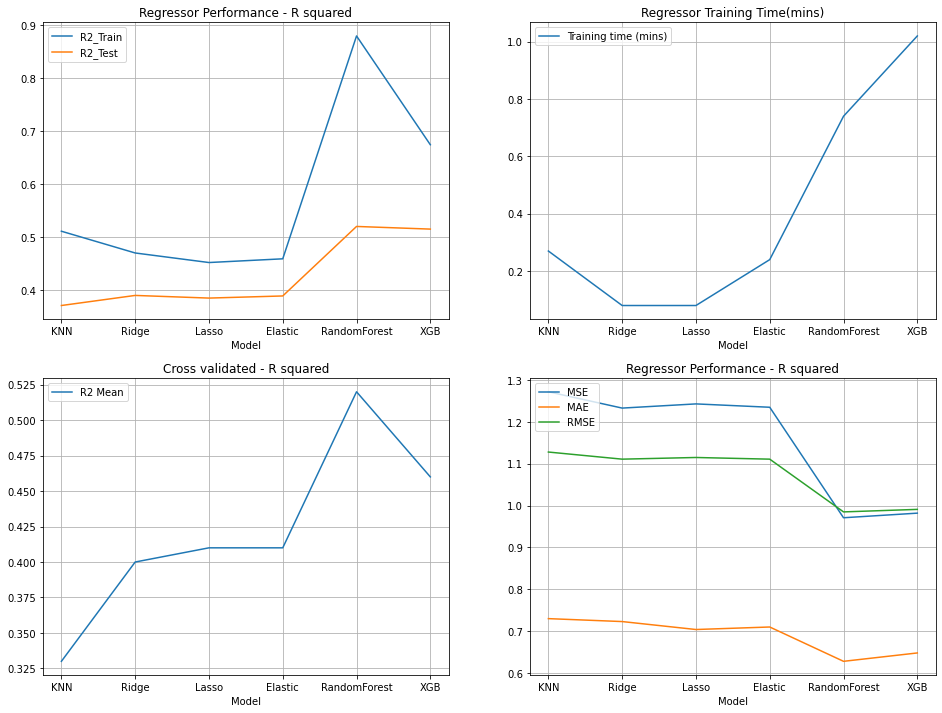

In [39]:
label_1 = ['R2_Train', 'R2_Test']
label_2 = ['MSE', 'MAE', 'RMSE']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16,12))

metric_log_GS[['R2_Train', 'R2_Test', 'Model']].plot(kind = 'line', x = 'Model', grid = True, 
                                title = 'Regressor Performance - R squared', ax = ax1)
ax1.legend(labels = label_1, loc = 'upper left')

metric_log_GS[['Training time (mins)', 'Model']].plot(kind = 'line', x = 'Model', grid = True,
                title = 'Regressor Training Time(mins)', ax = ax2)

scores_log[['R2 Mean', 'Model']].plot(kind = 'line', x = 'Model', grid = True, 
            title = 'Cross validated - R squared', ax = ax3)

metric_log_GS[['MSE', 'MAE', 'RMSE', 'Model']].plot(kind = 'line', x = 'Model', grid = True,
                    title = 'Regressor Performance - R squared', ax = ax4)
ax4.legend(labels = label_2, loc = 'upper left')
plt.show()

###### Narration -
 - Log tranformation of the target feature produced better models with better perfomances. XGBoost slight perfomed better than RandomForest during hyperparameter tuning while RandomForest slighly perfomed better when cross validate. Their training times are relatively close with RandomForest having the lesser running time. The margin in their R2 score on test data is significantly low. However, RandomForest performs far better on the train data than test data, suggesting more overfitting than the XGBoost.

### 3.4 Modeling 3
- log transformation of all input and target numerical features
- StandardScaler for numeric features due to log transformation that handled their skewness
- TargetEncoder for caterigorical features 
- kfold = 10 and random state = 50

##### 3.4.1 Log transformation of input numeric features

In [40]:
#log transformation of input numerical features
def log_num(feat):
    log_feat = "log" + feat
    Data_Emission[feat] = logtransformer.transform(Data_Emission[feat] + 1)
    return Data_Emission[feat]

for i in Num_feat:
    log_num(i)

X_log = Data_Emission.drop('TotalGHGEmissions', axis = 1)

In [41]:
num_log = Num_feat # list of numerical features

In [42]:
X_log.shape

(1522, 13)

In [43]:
y_log.shape

(1522,)

In [44]:
# Split data to 70% training and 30% test sets
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.30, random_state=50)

In [45]:
# Build model
def pipeline_2(Model_log2):
    
    # Instantiate the pipeline
    numeric_transformer = Pipeline([('scaler', StandardScaler())]) 
    categorical_transformer = Pipeline([('scaler', TargetEncoder())])

    preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, num_log),
        ("cat", categorical_transformer, Cat_feat),])
    
    model_pipe_log2 = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", Model_log2)])
    return model_pipe_log2

Instatiate pipelines

##### 3.4.2 Hyperparameter optimization and perfomance evaluation

In [46]:
#Instatiate pipelines

Models_log2_G = {"KNN" : pipeline_2(KNeighborsRegressor()), 
              #"LinearRegression" : pipeline_2(LinearRegression()),
              "Ridge" : pipeline_2(Ridge(alpha = 0.1)),
              "Lasso" : pipeline_2(Lasso(alpha = 0.1)),
              "Elastic" : pipeline_2(ElasticNet (alpha = 0.1)),
              #"SVR" : pipeline_2(SVR(kernel="linear")), 
              "RandomForest" : pipeline_2(RandomForestRegressor()), 
              #"DecisionTree": pipeline_2(DecisionTreeRegressor()), 
              "XGB": pipeline_2(XGBRegressor())             }         

In [47]:
kf = KFold(n_splits=10, shuffle=True, random_state=50)
GS_model_2_best_params = Models_log2_G.copy()
i=0

# create DataFrame for metric results
scores_GS_3 = pd.DataFrame({
                    'Model':Models_log2_G.keys(),
                    'MSE' : np.zeros(len(Models_log2_G)),
                    'MAE': np.zeros(len(Models_log2_G)),
                    'RMSE': np.zeros(len(Models_log2_G)),
                    'R2_Train': np.zeros(len(Models_log2_G)),
                    'R2_Test': np.zeros(len(Models_log2_G)),
                    'Training time (mins)': np.zeros(len(Models_log2_G))})
                    
# Make the GridSearchCV model 

for key, model in Models_log2_G.items():
    start = time.time()
    GS_model_2 = RandomizedSearchCV(estimator=model, param_distributions=parameters[key], n_jobs=-1, 
                                  n_iter = 20, cv=kf, verbose=0) 
    #GridSearchCV(estimator=model, param_grid=parameters[key], n_jobs=-1, cv=kf, verbose=0)
    

    # fitting the dataset i.e X and y
    reg_Xlog = GS_model_2.fit(X_log_train, y_log_train)
    y_pred_log = GS_model_2.predict(X_log_test)
    
    #get the results
    scores_GS_3.iloc[i,1] = round(mean_squared_error(y_log_test, y_pred_log), 3)
    scores_GS_3.iloc[i,2] = round(median_absolute_error(y_log_test, y_pred_log),3)
    scores_GS_3.iloc[i,3] = round(np.sqrt(mean_squared_error(y_log_test, y_pred_log)), 3)
    scores_GS_3.iloc[i,4] = round(reg_Xlog.score(X_log_train, y_log_train), 3)
    scores_GS_3.iloc[i,5] = round(reg_Xlog.score(X_log_test, y_log_test), 3)
    
    GS_model_2_best_params[key]=GS_model_2.best_params_
            
    stop = time.time()
    scores_GS_3.iloc[i,6]=np.round((stop - start)/60, 2)
          
    i += 1
    
scores_GS_3.sort_values('R2_Test', ascending = False)

,Model,MSE,MAE,RMSE,R2_Train,R2_Test,Training time (mins)
4,RandomForest,0.970,0.620,0.985,0.862,0.520,0.86
5,XGB,0.982,0.648,0.991,0.674,0.514,1.09
3,Elastic,1.039,0.709,1.019,0.550,0.487,0.23
1,Ridge,1.058,0.695,1.029,0.544,0.477,0.07
0,KNN,1.077,0.682,1.038,0.585,0.468,0.26
2,Lasso,1.103,0.713,1.050,0.516,0.455,0.07


In [48]:
GS_model_2_best_params

{'KNN': {'regressor__p': 1, 'regressor__n_neighbors': 10},
 'Ridge': {'regressor__solver': 'auto',
  'regressor__normalize': True,
  'regressor__alpha': 0.1},
 'Lasso': {'regressor__fit_intercept': True, 'regressor__alpha': 0.1},
 'Elastic': {'regressor__max_iter': 10,
  'regressor__l1_ratio': 0.30000000000000004,
  'regressor__alpha': 0.01},
 'RandomForest': {'regressor__random_state': 50,
  'regressor__n_estimators': 200,
  'regressor__min_samples_split': 5,
  'regressor__min_samples_leaf': 1,
  'regressor__max_features': 'sqrt',
  'regressor__max_depth': 15,
  'regressor__bootstrap': True},
 'XGB': {'regressor__n_estimators': 125,
  'regressor__min_child_weight': 3,
  'regressor__max_depth': 3,
  'regressor__learning_rate': 0.05,
  'regressor__gamma': 0.5}}

##### 3.5.1 cross validation

In [49]:
# create 5 folds

kfold = KFold(n_splits=10, shuffle=True, random_state=50)

i=0

#Create result dictionary and dataframe

cv_scores_log2 = pd.DataFrame({'Model':Models_log2_G.keys(),
                               'R2 Mean' : np.zeros(len(Models_log2_G)),
                              'Std': np.zeros(len(Models_log2_G)),
                              'Training time (mins)': np.zeros(len(Models_log2_G))})

#Create the regression models
for key, model in Models_log2_G.items():
    cv_score2 = cross_val_score(model, X_log, y_log, cv=kfold, scoring='r2')
        
    cv_scores_log2.iloc[i,1] = round(cv_score2.mean(), 2)
    cv_scores_log2.iloc[i,2] = round(cv_score2.std(), 2)
        
    stop = time.time()
    cv_scores_log2.iloc[i,3]=np.round((stop - start)/60, 2)  
    i+=1
    
cv_scores_log2.sort_values('R2 Mean', ascending = False)

,Model,R2 Mean,Std,Training time (mins)
4,RandomForest,0.52,0.05,1.46
1,Ridge,0.50,0.03,1.16
2,Lasso,0.48,0.04,1.19
3,Elastic,0.48,0.03,1.22
5,XGB,0.46,0.06,1.55
0,KNN,0.43,0.04,1.13


visualization of performance metrics and running time

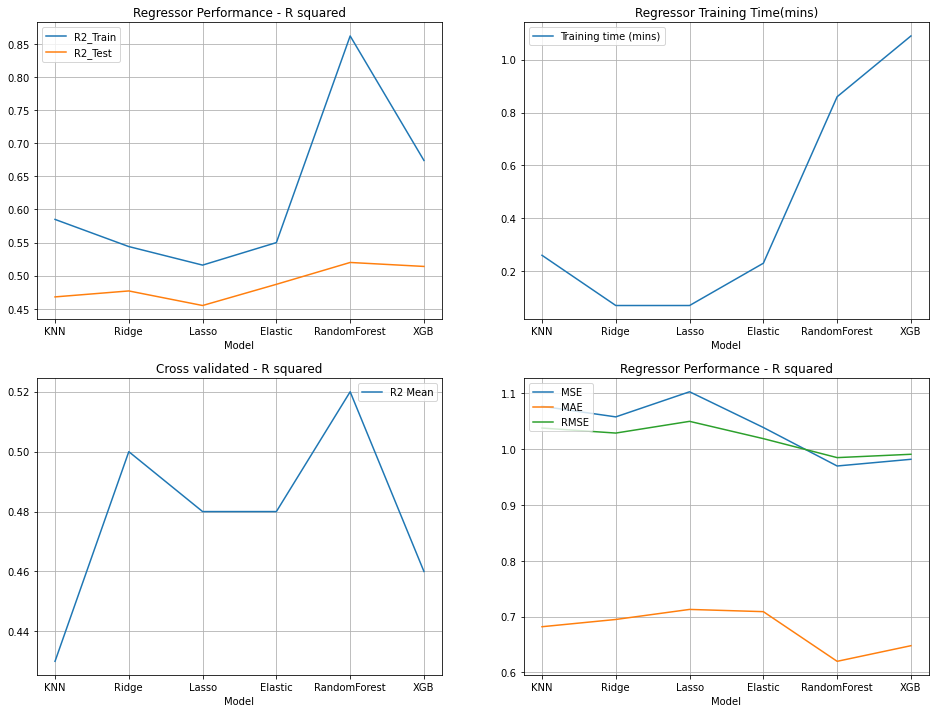

In [50]:
label_1 = ['R2_Train', 'R2_Test']
label_2 = ['MSE', 'MAE', 'RMSE']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16,12))

scores_GS_3[['R2_Train', 'R2_Test', 'Model']].plot(kind = 'line', x = 'Model', grid = True, 
                                title = 'Regressor Performance - R squared', ax = ax1)
ax1.legend(labels = label_1, loc = 'upper left')

scores_GS_3[['Training time (mins)', 'Model']].plot(kind = 'line', x = 'Model', grid = True,
                title = 'Regressor Training Time(mins)', ax = ax2)

cv_scores_log2[['R2 Mean', 'Model']].plot(kind = 'line', x = 'Model', grid = True, 
            title = 'Cross validated - R squared', ax = ax3)

scores_GS_3[['MSE', 'MAE', 'RMSE', 'Model']].plot(kind = 'line', x = 'Model', grid = True,
                    title = 'Regressor Performance - R squared', ax = ax4)
ax4.legend(labels = label_2, loc = 'upper left')
plt.show()

- Log transformation of both the input and target numeric features produced slight increases the model perfomances. Again, XGBoost slight perfomed better than RandomForest during hyperparameter tuning while RandomForest slighly perfomed better when cross validated. Although, the differences in their scores and training times are significantly low, RandomForestRegressor returns higher R2 and lower training time and standard deviation than XGBoost.

###### Narration-
Among the 3 tested modelings(iterations), modeling 1 has the worse perfomance metrics. Modeling 2 and 3 both returns similar metric results but modeling 3 is better because it handles the the transformation of all the skewed numeric features. 

Overall, the linear models (Ridge, Elastic, and Lasso) and KNN returned poorer metrics on both the training and test datasets than the non-linear RandomForestRegressor and XGBoost. The RandomForestRegressor and XGBoost algorithms have almost similar metric performances on train data set and prediction qualities, making either of the two algorithms  favorable for this task. Both algorithms have high train perfomances and don't perform so well on the test set, indicating higher overfitting. However, RandomForestRegressor has a slightly better computation time and lower standard deviation than XGBoost when cross validated with K-fold, making it a better option for energy predictions between the two models. Nonetheless, we will take a closer look at the two algorithms using their tuned parameters. 

### 4.0 Selection of best model
 - best iteration/modeling is modeling 3 - all numeric variables transformed

In [51]:
# Using modeling 3
# create models
Model_best = {"RandomForest" : pipeline_2(RandomForestRegressor()), 
               "XGB": pipeline_2(XGBRegressor())}

RF_param = {'regressor__random_state': [50],
  'regressor__n_estimators': [100],
  'regressor__min_samples_split': [5],
  'regressor__min_samples_leaf': [2],
  'regressor__max_features': ['log2'],
  'regressor__max_depth': [25],
  'regressor__bootstrap': [True]}

XGB_param = {'regressor__n_estimators': [50],
  'regressor__min_child_weight': [9],
  'regressor__max_depth': [3],
  'regressor__learning_rate': [0.1],
  'regressor__gamma': [0.25]}

param_best = {"RandomForest": RF_param, "XGB": XGB_param}     

In [52]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.30, random_state=50)

kf = KFold(n_splits=10, shuffle=True, random_state=50)

i=0

# create DataFrame for metric results
scores_best = pd.DataFrame({
                    'Model':Model_best.keys(),
                    'MSE' : np.zeros(len(Model_best)),
                    'MAE': np.zeros(len(Model_best)),
                    'RMSE': np.zeros(len(Model_best)),
                    'R2_Train': np.zeros(len(Model_best)),
                    'R2_Test': np.zeros(len(Model_best)),
                    'Training time (mins)': np.zeros(len(Model_best))})
                    
# Make the GridSearchCV model 

for key, model in Model_best.items():
    start = time.time()
    GS_best = RandomizedSearchCV(estimator=model, param_distributions=param_best[key], n_jobs=-1, 
                                  n_iter = 20, cv=kf, verbose=0) 
        

    # fitting the dataset i.e X and y
    reg_best = GS_best.fit(X_log_train, y_log_train)
    y_pred_best = GS_best.predict(X_log_test)
    
    #get the results
    scores_best.iloc[i,1] = mean_squared_error(y_log_test, y_pred_best)
    scores_best.iloc[i,2] = median_absolute_error(y_log_test, y_pred_best)
    scores_best.iloc[i,3] = np.sqrt(mean_squared_error(y_log_test, y_pred_best))
    scores_best.iloc[i,4] = reg_Xlog.score(X_log_train, y_log_train)
    scores_best.iloc[i,5] = reg_Xlog.score(X_log_test, y_log_test)
    
          
    stop = time.time()
    scores_best.iloc[i,6]=np.round((stop - start)/60, 2)
          
    i += 1
    
scores_best.sort_values('R2_Test', ascending = False)

,Model,MSE,MAE,RMSE,R2_Train,R2_Test,Training time (mins)
0,RandomForest,0.972819,0.627699,0.986316,0.673645,0.514452,0.04
1,XGB,0.973945,0.627627,0.986887,0.673645,0.514452,0.03


In [53]:
i=0

Regressor = {"RandomForest" : pipeline_2(RandomForestRegressor(random_state = 50,n_estimators = 100,
  min_samples_split = 5, min_samples_leaf = 2, max_features = 'log2',max_depth = 25, bootstrap= True)), 
               "XGB": pipeline_2(XGBRegressor(n_estimators = 50, min_child_weight = 9,max_depth = 3,
  learning_rate = 0.1, gamma = 0.25))}



#Create result dictionary and dataframe

scores = pd.DataFrame({'Model':Regressor.keys(),
                               'R2 Mean' : np.zeros(len(Regressor)),
                              'Std': np.zeros(len(Regressor)),
                              'Training time (mins)': np.zeros(len(Regressor))})

#Create the regression models
for key, regressor in Regressor.items():
    cv_result = cross_val_score(regressor, X_log, y_log, cv=kf, scoring='r2')
        
    scores.iloc[i,1] = cv_result.mean()
    scores.iloc[i,2] = cv_result.std()
        
    stop = time.time()
    scores.iloc[i,3]=np.round((stop - start)/60, 2)  
    i+=1
    
scores.sort_values('R2 Mean', ascending = False)

,Model,R2 Mean,Std,Training time (mins)
0,RandomForest,0.533018,0.036096,0.14
1,XGB,0.527432,0.037613,0.19


- In conclusion, RandomForestRegressor and XGBoost both have close metric perfomances with near-zero differences. However, the higher R2 score, better running time, and low standard deviation give RandomForestRegressor an advantage over XGBoost, making it the selected algorithm for energy prediction in this task

### 5.0 Feature importance

##### 5.1 SHAP

In [54]:
#!pip install shap

In [55]:
# import shap
import shap

## load JS visualization code 
shap.initjs()

#instantiate regressor model
regressor = RandomForestRegressor(random_state = 50,n_estimators = 100, min_samples_split = 5, 
                                  min_samples_leaf = 2, max_features = 'log2', max_depth = 25, bootstrap= True)

In [56]:
#Scale numeric features
Scaled_numeric = StandardScaler().fit_transform(Data_Emission[num_log])

# put scaled numeric feature in a dataframe
Scaled_numeric_df = pd.DataFrame(Scaled_numeric, columns = num_log)

#scale categorical features
Scaled_category = TargetEncoder().fit_transform(Data_Emission[Cat_feat], y_log)

# combine dataframes of numeric and standard features 
X_scaled = pd.concat([Scaled_category, Scaled_numeric_df], axis = 1)

In [57]:
X_scaled_train, X_scaled_test, y_log_train, y_log_test = train_test_split(X_scaled, y_log, test_size=0.30, random_state=50)

In [58]:
# train RandomForestRegressor model
regressor.fit(X_scaled, y_log)

RandomForestRegressor(max_depth=25, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, random_state=50)

##### 5.1.1 Global feature importance (explainability)
 - to have a better idea of what features affect the prediction the most and how the model is making its decisions

In [59]:
# explain the model's predictions using SHAP values
shap_values = shap.Explainer(regressor).shap_values(X_scaled)

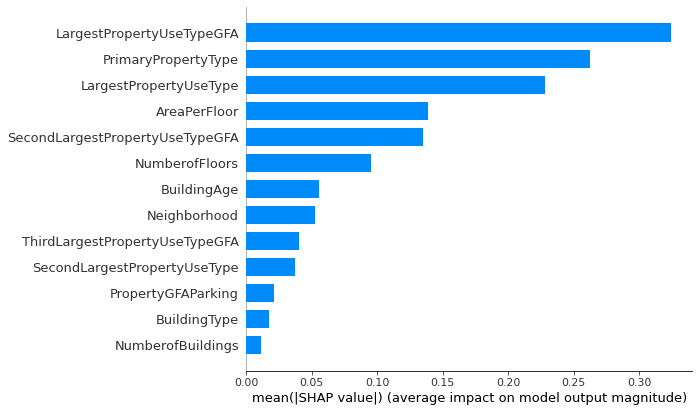

In [60]:
# # visualize the summary effects of all the features
shap.summary_plot(shap_values, X_scaled, plot_type = 'bar')

Narration -
 - The surface area of the largest property and the primary use of the properties have the largest influence on energy consumption, respectively.

 96%|=================== | 440/457 [00:23<00:00]       

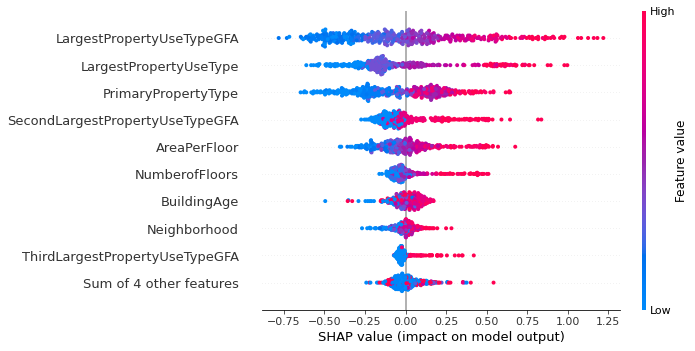

In [61]:
# visualize the training set predictions
shap_values = shap.Explainer(regressor, X_scaled_train)(X_scaled_test)
shap.plots.beeswarm(shap_values)

##### 5.1.2 Local feature importance (explainability)
- concerned with explaining each individual prediction. 

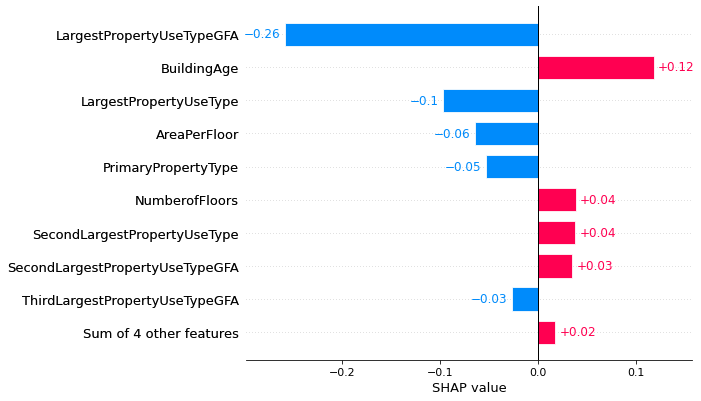

In [62]:
shap.plots.bar(shap_values[4])

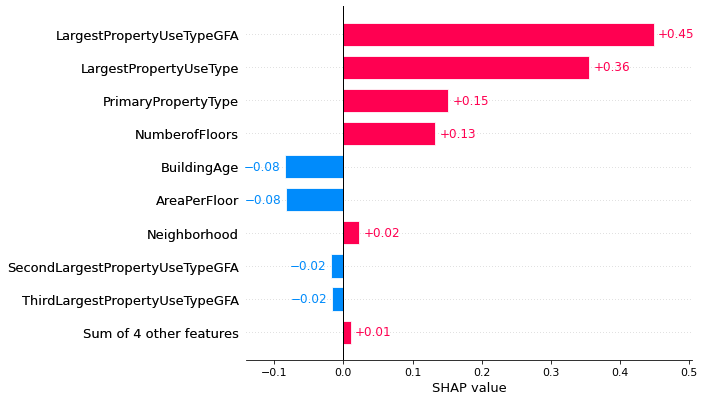

In [63]:
shap.plots.bar(shap_values[3])

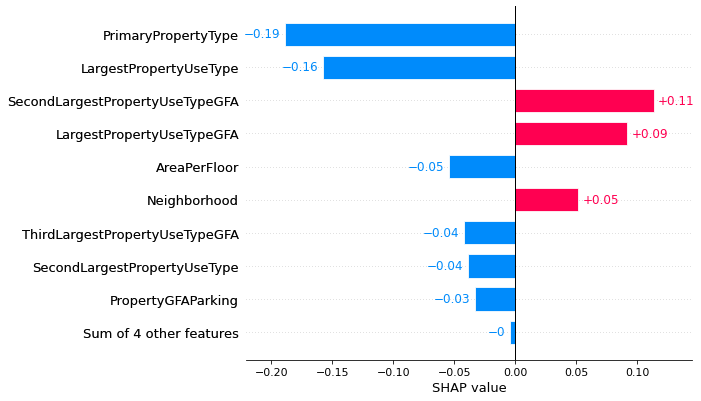

In [64]:
shap.plots.bar(shap_values[20])

### 6.0 Influence of Energy star score 

Using modeling 3

In [65]:
Data_Emission['ENERGYSTARScore'] = Data['ENERGYSTARScore']

In [66]:
Data_Emission['ENERGYSTARScore'].isnull().sum()

503

In [67]:
# Replace NaN with median
Data_Emission['ENERGYSTARScore'].fillna(Data_Emission['ENERGYSTARScore'].median(), inplace = True)

Distribution plot of EnergyStarScore

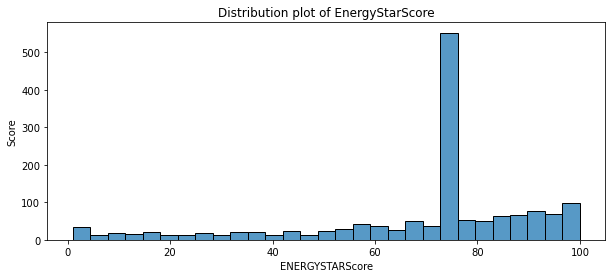

In [68]:
plt.figure(figsize=(10, 4))
plt.grid(False) 
sns.histplot(data = Data_Emission, x = 'ENERGYSTARScore')
plt.ylabel('Score')
plt.title('Distribution plot of EnergyStarScore')
plt.show()

Relationship between Energy Starscore and gas emission

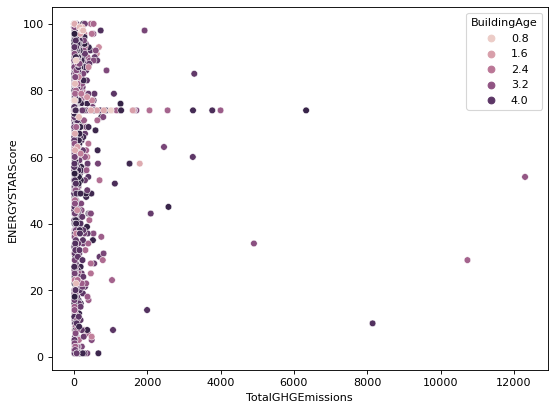

In [69]:
plt.figure(figsize=(8,6), dpi = 80)
plt.grid(False)
sns.scatterplot(x = 'TotalGHGEmissions', y = 'ENERGYSTARScore', data = Data_Emission, hue = 'BuildingAge') 
plt.show()

In [70]:
#log transform 'ENERGYSTARScore'
Data_Emission['Log_ESS'] = logtransformer.transform(Data_Emission['ENERGYSTARScore'] + 1) 

In [71]:
X_ESS = Data_Emission.drop(['TotalGHGEmissions', 'ENERGYSTARScore'], axis = 1)

In [72]:
Num_feat_E = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'Log_ESS', 'BuildingAge', 'AreaPerFloor']
Cat_feat = ['BuildingType', 'Neighborhood', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']

In [73]:
X_ESS.shape

(1522, 14)

In [74]:
y_log.shape

(1522,)

In [75]:
X_ESS_train, X_ESS_test, y_log_train, y_log_test = train_test_split(X_ESS, y_log, test_size=0.30, random_state=50)

In [76]:
# standadize and instantiate the pipeline
numeric_transformer = Pipeline([('scaler', StandardScaler())]) 
categorical_transformer = Pipeline([('scaler', TargetEncoder())])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, Num_feat_E),
        ("cat", categorical_transformer, Cat_feat),])
    
model_pipe_ESS = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", RandomForestRegressor
        (random_state = 50,n_estimators = 100, min_samples_split = 5, min_samples_leaf = 2, 
         max_features = 'log2', max_depth = 25, bootstrap= True))])

In [77]:
# fit the model
model_pipe_ESS.fit(X_ESS_train, y_log_train) 

# predict the model
y_pred_ESS = model_pipe_ESS.predict(X_ESS_test) 

###### 6.1 Metric perfomance
 - Test set

In [78]:
# Quantify and print model score
print("R2 Test: %.4f" % model_pipe_ESS.score(X_ESS_test, y_log_test)) # coefficient of determinantion
print("MSE: %.3f" % mean_squared_error(y_log_test, y_pred_ESS))
print("MAE: %.3f" % median_absolute_error(y_log_test, y_pred_ESS))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_log_test, y_pred_ESS)))

R2 Test: 0.5622
MSE: 0.886
MAE: 0.592
RMSE: 0.941


 - Train set

In [79]:
y_pred_ESS = model_pipe_ESS.predict(X_ESS_train) 
# Quantify and print model score
print("R2 Train: %.4f" % model_pipe_ESS.score(X_ESS_train, y_log_train)) # coefficient of determinantion
print("MSE: %.3f" % mean_squared_error(y_log_train, y_pred_ESS))
print("MAE: %.3f" % median_absolute_error(y_log_train, y_pred_ESS))
print("RMSE: %.3f" % np.sqrt(mean_squared_error(y_log_train, y_pred_ESS)))

R2 Train: 0.8531
MSE: 0.313
MAE: 0.336
RMSE: 0.559


###### 6.2 Cross validation

In [80]:
kfold = KFold(n_splits=10, shuffle=True, random_state=50)

cv_result = cross_val_score(model_pipe_ESS, X_ESS, y_log, cv=kfold, scoring='r2')
print("cv_result mean: %.3f" % cv_result.mean())
print("cv_result std: %.3f" % cv_result.std())

cv_result mean: 0.575
cv_result std: 0.035


###### 6.3 Conclusion
 - The perfomance of the RandomForestRegressor improves with EnergyStarScore

###### 6.4 Feature importance with EnergyStarScore

In [81]:
#Scale numeric features
Scaled_numeric_ESS = StandardScaler().fit_transform(Data_Emission[Num_feat_E])

# put scaled numeric feature in a dataframe
ESS_numeric_df = pd.DataFrame(Scaled_numeric_ESS, columns = Num_feat_E)

#scale categorical features
Scaled_category = TargetEncoder().fit_transform(Data_Emission[Cat_feat], y_log)

# combine dataframes of numeric and standard features 
X_scaled_ESS = pd.concat([Scaled_category, ESS_numeric_df], axis = 1)

In [82]:
X_scaled_ESS_train, X_scaled_ESS_test, y_log_train, y_log_test = train_test_split(X_scaled_ESS, y_log, 
                                                                                  test_size=0.30, random_state=50)

In [83]:
# train RandomForestRegressor model
regressor.fit(X_scaled_ESS, y_log)

RandomForestRegressor(max_depth=25, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, random_state=50)

In [84]:
# explain the model's predictions using SHAP values
shap_values = shap.Explainer(regressor).shap_values(X_scaled_ESS)

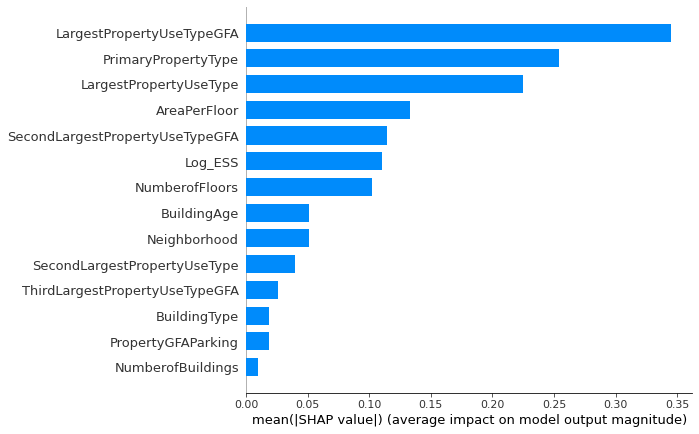

In [85]:
shap.summary_plot(shap_values, X_scaled_ESS, plot_type = 'bar')

- EnergyStarScore is the 6th important feature in predicting gas emmission